An example of using the Ebola model. Note that:
- We do not need to define a dummy state, tau, to denote time
- We should define the total population, N

Illegal jump, x: [1.99985e+05 6.00000e+00 1.00000e+00 4.00000e+00 1.00000e+00 3.00000e+00], new x: [ 1.99984e+05  7.00000e+00  1.00000e+00  4.00000e+00 -1.00000e+00
  5.00000e+00]
Illegal jump, x: [1.99993e+05 3.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 3.00000e+00], new x: [ 1.99993e+05  3.00000e+00  0.00000e+00  0.00000e+00 -1.00000e+00
  5.00000e+00]
Illegal jump, x: [1.99684e+05 2.00000e+00 1.00000e+00 3.00000e+00 1.00000e+00 3.09000e+02], new x: [ 1.99684e+05  2.00000e+00  1.00000e+00  3.00000e+00 -2.00000e+00
  3.12000e+02]


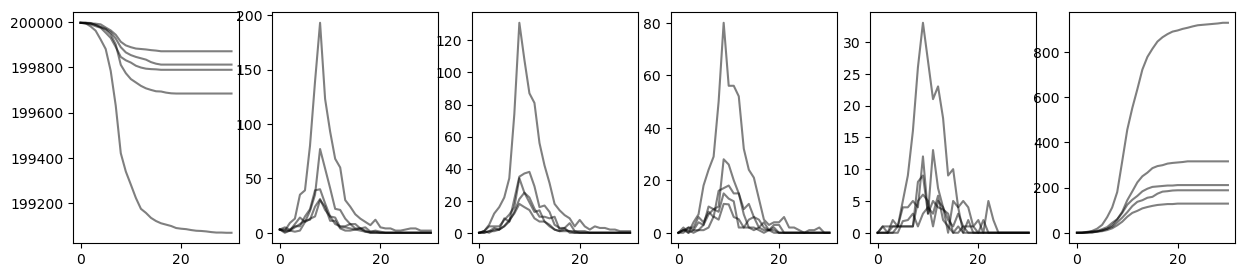

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygom import common_models

n_pop=200000        # population
i0=3                # initial infecteds

# Initial conditions: [S, E, I, H, F, R]
x0 = [n_pop-i0, i0, 0, 0, 0, 0]

# Timepoints
t = np.linspace(0, 30, 31)

# Parameters from Legrand et al (https://doi.org/10.1017/S0950268806007217) for 1995 DRC outbreak

ode = common_models.Legrand_Ebola_SEIHFR([('beta_I',0.588),             # Transmission rate of infectious (weeks^{-1})
                                          ('beta_H',0.794),             # Transmission rate of hospitalised (weeks^{-1})
                                          ('beta_F',7.653),             # Transmission rate of dead during funeral (weeks^{-1})
                                          ('omega_I',10.0/7.0),         # Time between onset to recovery if not hospitalised (weeks)
                                          ('omega_D',9.6/7.0),          # Time between onset to death if not hospitalised (weeks)
                                          ('omega_H',5.0/7.0),          # Time between onset to hospitalisation (weeks)
                                          ('omega_F',2.0/7.0),          # Time between death and traditional burial (weeks)
                                          ('alphaInv',7.0/7.0),         # Incubation period (weeks)
                                          ('delta',0.81),               # Case-fatality ratio
                                          ('theta',0.80),               # Proportion of cases that are hospitalized
                                          ('kappa', 0.1),               # Timescale over which interventions come into effect (don't want this too quick) (weeks)
                                          ('interventionTime', 8.0),    # Time after simulation starts to begin interventions (weeks)
                                          ('N', n_pop)])                # Population

ode.initial_values = (x0, t[0])
# Set timestep to be 0.1 weeks since adaptive tau leap might struggle
ode.pre_tau=0.01

# Simulate
np.random.seed(1)
n_sim=5
solution, jump, simT = ode.solve_stochast(t, n_sim, full_output=True)

# Plot
f, ax = plt.subplots(1, 6, figsize=(15, 3))
for i_axis in range(6):
    for i_sim in range(n_sim):
        ax[i_axis].plot(t, solution[i_sim][:,i_axis], color="black", alpha=0.5)

plt.show()